# Inference Steps

This notebook will describe the necessary data structures required for inference on our model. 

In [56]:
# imports
from pathlib import Path

import numpy as np 
import pandas as pd
from shapely import Polygon
import matplotlib.pyplot as plt

import rasterio
from rasterio import plot as rio_plot

# inference utils
from inference_utils import (
    preprocess_image,
    compute_mean_std,
    load_evi_data_and_prepare_features,
    find_closest_date,
    find_closest_date_in_df,
    mask_evi_data,
    predict,
    predict_weekly_yield
)


EVI_DATA_DIR = Path("./landsat_evi_monterey_masked")
print(f"{EVI_DATA_DIR.exists() = }")


EVI_DATA_DIR.exists() = True


Found 83 evi files.
Plotting converted-LC08_L2SP_043035_20140412_20200911_02_T1_SR_EVI_masked.tiff


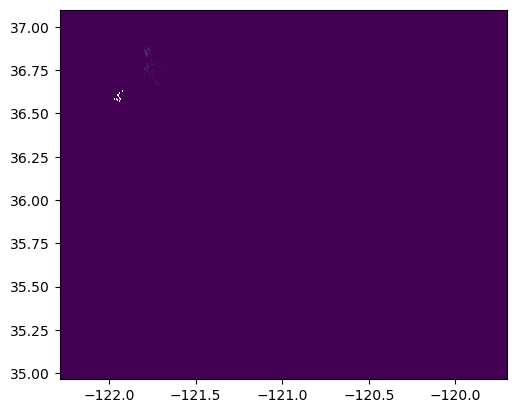

<Axes: >

In [57]:
# lets visualize every step of inference.
# starting with inputs

evi_files = [f for f in EVI_DATA_DIR.glob("*.tiff")]
print(f"Found {len(evi_files)} evi files.")

# pick one randomly 
ex_evi_file = np.random.choice(evi_files)
print(f"Plotting {ex_evi_file.name}")

rio_datareader = rasterio.open(ex_evi_file)
raster_transform = rio_datareader.transform
raster_crs = rio_datareader.crs
rio_plot.show(rio_datareader)





In [59]:
# define the polygon we are interested in (not tied directly to model)
polygon_coords = np.array([
    [100, 100],
    [100, 200],
    [200, 200],
    [200, 100],
    [100, 100]
])

polygon = Polygon(polygon_coords)
polygon_area = polygon.area

METERS_PER_SQR_PX = 30

polygon_area_acres = polygon_area * METERS_PER_SQR_PX





In [ ]:
# get the time index information we need
from pathlib import Path
from utils import process_yield_data
YIELD_DATA_PATH = Path("./combined_yield_data.csv")

yield_data_weekly = process_yield_data(YIELD_DATA_PATH)


start_date = pd.to_datetime("2022-07-01")